In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X = pd.read_csv("../linearRegession/Training Data/Linear_X_Train.csv")

In [3]:
y = pd.read_csv("../linearRegession/Training Data/Linear_Y_Train.csv")

In [4]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [5]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [6]:
# visulaiution 


In [7]:
#converting into Numpy
X = X.values
y = y.values

In [8]:
# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

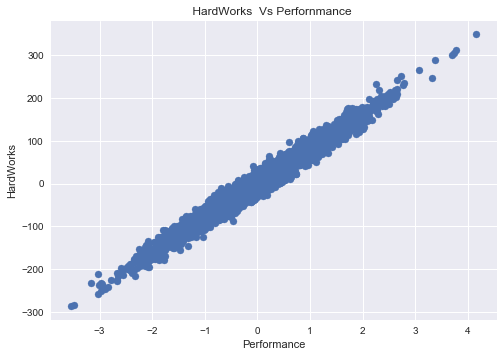

(3750, 1) (3750, 1)


In [9]:
plt.style.use("seaborn")
plt.scatter(X , y)
plt.title(" HardWorks  Vs Perfornmance  ")
plt.xlabel("Performance")
plt.ylabel("HardWorks")
plt.show()
print(X.shape , y.shape)


###  Implementation linear Regression 

In [10]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_
def gradient(X , Y , theta ):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i] , theta)
        y = Y[i]
        grad[0] += (y_-y)
        grad[1] += (y_ -y)*x
    return grad/m
def error(X , Y ,theta):
    m=X.shape[0]
    total_error = 0 
    for i in range(m):
        y_ = hypothesis(X[i] , theta)
        total_error +=(y_ - Y[i])**2
    return total_error/m

def gradientDescent(X , Y, max_steps = 100  , lr = .1):
    theta  =np.zeros((2,))
    error_list= []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X , Y ,theta)
        e = error(X ,Y , theta)
        error_list.append(e)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1] 
        theta_list.append((theta[0] , theta[1]))
    return theta , error_list  ,theta_list

In [11]:
theta , errorlist , theta_list = gradientDescent(X , y)

In [12]:
print(theta)

[ 0.6838508  79.90361453]


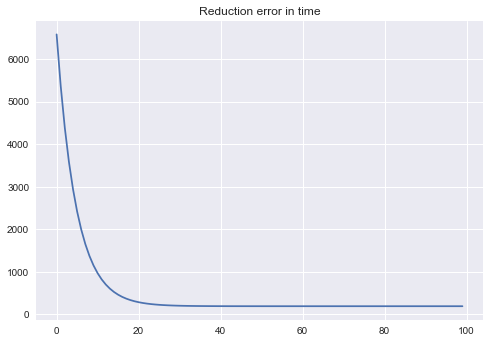

In [13]:
plt.plot(errorlist)
plt.title( "Reduction error in time")
plt.show()

In [14]:
y_ = hypothesis(X , theta)

In [15]:
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


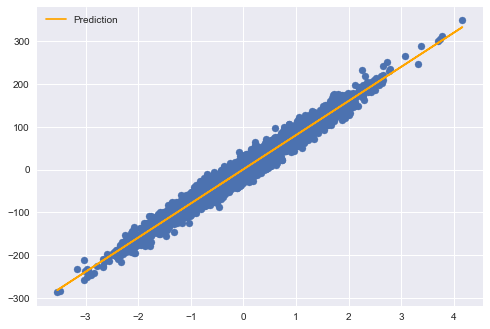

In [16]:
plt.scatter(X , y)
plt.plot(X , y_ , color = "orange" , label = "Prediction")

plt.legend()
plt.show()

In [17]:
X_test = pd.read_csv("../linearRegession/Test Cases/Linear_X_Test.csv").values

In [18]:
ytest = hypothesis(X_test ,theta)

In [19]:
print(ytest.shape)

(1250, 1)


In [20]:
df = pd.DataFrame(data=ytest  , columns=["y"])

In [21]:
df.to_csv("ypredict.csv", index = False)

In [22]:
df.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


### Section - $ Computing Score

In [23]:
def score(Y , Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [24]:
score(y , y_)

97.09612226971643

In [25]:
theta

array([ 0.6838508 , 79.90361453])

In [26]:
T0 = np.arange(-40 ,40 ,1 )
T1 = np.arange(40 , 120 , 1)

In [27]:
print(T1)

[ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119]


In [28]:
T0 , T1 = np.meshgrid(T0 , T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        
        y_ = T1[i, j]*X + T0[i , j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

In [29]:
print(J)

[[3438.6006145  3358.23287657 3279.86513863 ... 3102.28479343
  3175.91705549 3251.54931756]
 [3359.78914062 3279.42140268 3201.05366475 ... 3023.47331954
  3097.10558161 3172.73784367]
 [3282.97766673 3202.6099288  3124.24219086 ... 2946.66184566
  3020.29410772 3095.92636979]
 ...
 [3222.11712536 3141.74938742 3063.38164949 ... 2885.80130428
  2959.43356635 3035.06582841]
 [3297.30565147 3216.93791354 3138.5701756  ... 2960.9898304
  3034.62209246 3110.25435453]
 [3374.49417759 3294.12643965 3215.75870172 ... 3038.17835651
  3111.81061858 3187.44288064]]


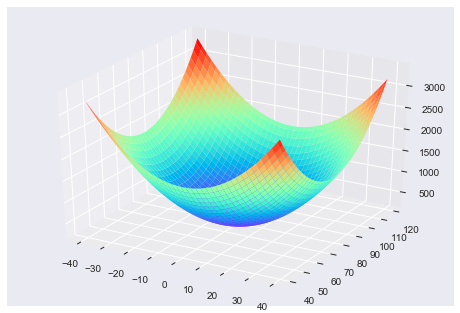

In [30]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0 , T1 , J , cmap="rainbow")
plt.show()

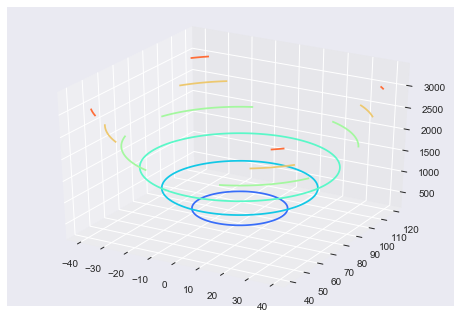

In [31]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0 , T1 , J , cmap="rainbow")
plt.show()

In [32]:
theta_list

[(0.06838689680155924, 7.990573694249979),
 (0.12993510392296198, 15.182090019074964),
 (0.18532849033222443, 21.654454711417454),
 (0.23518253810056078, 27.479582934525695),
 (0.2800511810920641, 32.72219833532309),
 (0.3204329597844162, 37.44055219604077),
 (0.35677656060753327, 41.68707067068668),
 (0.3894858013483388, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.4454186030151161, 52.044329230348026),
 (0.46926363951516337, 54.83047000156319),
 (0.490724172365206, 57.337996695656855),
 (0.5100386519302443, 59.594770720341145),
 (0.5274216835387786, 61.62586734255701),
 (0.5430664119864597, 63.45385430255129),
 (0.5571466675893725, 65.09904256654615),
 (0.569818897631994, 66.57971200414151),
 (0.5812239046703536, 67.91231449797735),
 (0.591488411004877, 69.11165674242959),
 (0.6007264667059482, 70.19106476243661),
 (0.6090407168369123, 71.16253198044294),
 (0.6165235419547797, 72.03685247664862),
 (0.6232580845608605, 72.82374092323374),
 (0.6293191729063334, 7

### plot the changes in values of theta 

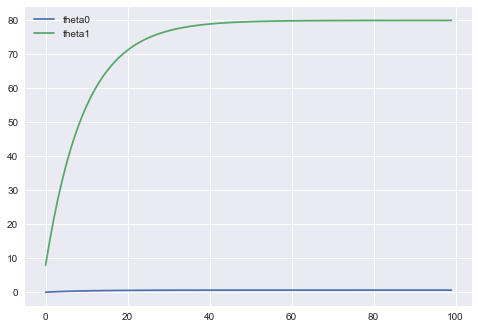

In [33]:
theta_list = np.array(theta_list)
plt.plot(theta_list[: , 0] , label = "theta0")
plt.plot(theta_list[: , 1] , label = "theta1")
plt.legend()
plt.show()




In [ ]:
## Trajectory Traced by theta update in the loss function 

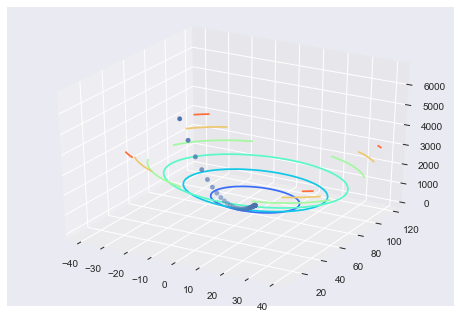

In [34]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0 , T1 , J , cmap="rainbow")
axes.scatter(theta_list[: , 0 ] , theta_list[: ,1 ] , errorlist)
plt.show()

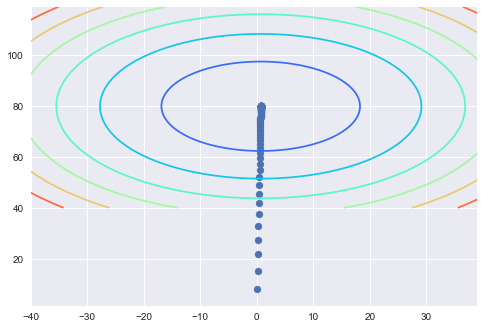

In [35]:
plt.contour(T0 , T1 , J  , cmap="rainbow")
plt.scatter(theta_list[: , 0 ] , theta_list[: ,1 ] )
plt.show()